In [1]:
import matplotlib.pyplot as plt
import numpy as np
import typy

In [2]:
# #Location of data files
file_path = f"./data/"
# Model generation
model = typy.model(file_path,nscf="nscf.out",hr="wannier_hr.dat")

In [257]:
N = 150

In [258]:
# Define hexagonal mesh
hx,hy = typy.hexagon_cartesian(N)
crystal_mesh = typy.hexagon_crystal(N)

In [259]:
# Define triangle mesh
triangle = typy.triangle_mesh(N)
tx,ty = triangle
inv_g = np.linalg.inv(model.g_vec)
tmesh = np.dot(triangle.T,inv_g)/1.6

In [260]:
triangle.shape

(2, 9688)

(-0.05773505050460146,
 1.2124360605966307,
 -0.6491710504325435,
 0.9308809480710927)

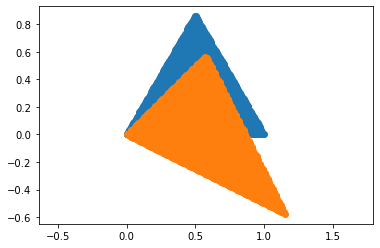

In [261]:
plt.scatter(tx,ty)
plt.scatter(cx,cy)
plt.axis("equal")

In [262]:
#Calculate band structure
band_index = 6
metal_band = model.calculate_energy(tmesh,band_index)

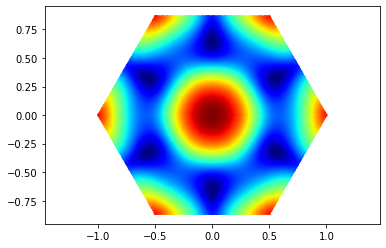

In [263]:
triangle = typy.triangle_mesh(N).T
fold =6 
grid = np.zeros(shape=(fold,len(triangle),2))
for n in range(0,fold):
    theta = n*np.pi/3
    tx,ty = typy.rotate(triangle, theta)
    plt.scatter(tx,ty,c=metal_band,cmap="jet",s=2)
    # plt.scatter(tx+model.g_vec[0][0],ty+model.g_vec[0][1],c=metal_band,cmap="jet",s=1)
    # plt.scatter(tx+model.g_vec[1][0],ty+model.g_vec[1][1],c=metal_band,cmap="jet",s=1)
plt.axis("equal")
plt.show()

In [264]:
def suscep_q(q,model,k_mesh,xi_k,fd_k,band_index,T,delta):
    xi_kq = model.calculate_energy(k_mesh+q,band_index)
    fd_kq = typy.fd(xi_kq,T)
    num = fd_k-fd_kq
    den = xi_k-xi_kq+1j*delta
    res = -np.average(num/den).real
    return(res)

In [265]:
def susceptibility(model,k_mesh,q_mesh,delta=0.0001, T=10):
    xi_k = model.calculate_energy(k_mesh,band_index)
    fd_k = typy.fd(xi_k,T)
    sus_res = np.array([suscep_q(q,model,k_mesh,xi_k,fd_k,band_index,T,delta) for q in q_mesh])
    return(sus_res)

In [266]:
bz = typy.mesh_cartesian(150)

In [ ]:
calculate_suscep = susceptibility(model,bz,tmesh)

In [225]:
np.savetxt("calculate_suscep.txt",calculate_suscep)

In [224]:
calculate_suscep.shape

(17248,)

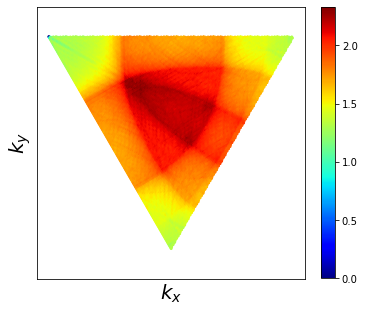

In [219]:
fig = plt.figure(figsize=(6,5))
plt.scatter(tx,ty,c=calculate_suscep,cmap='jet',s=4)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel(r"$k_x$",fontsize=20)
plt.ylabel(r"$k_y$",fontsize=20)
plt.axis("equal")
# plt.savefig("hexagon_electron.png")
plt.show()

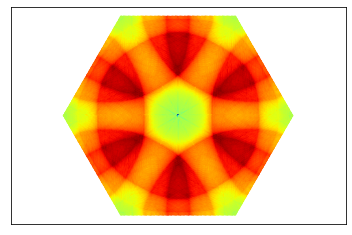

In [223]:
triangle = typy.triangle_mesh(N).T
fold =6 
grid = np.zeros(shape=(fold,len(triangle),2))
for n in range(0,fold):
    theta = n*np.pi/3
    tx,ty = typy.rotate(triangle, theta)
    plt.scatter(tx,ty,c=calculate_suscep,cmap="jet",s=2)
    # plt.scatter(tx+model.g_vec[0][0],ty+model.g_vec[0][1],c=metal_band,cmap="jet",s=1)
    # plt.scatter(tx+model.g_vec[1][0],ty+model.g_vec[1][1],c=metal_band,cmap="jet",s=1)
plt.xticks([])
plt.yticks([])
# plt.colorbar()
plt.axis("equal")
plt.savefig("hexagon_susceptibility.png", transparent=True)
plt.show()

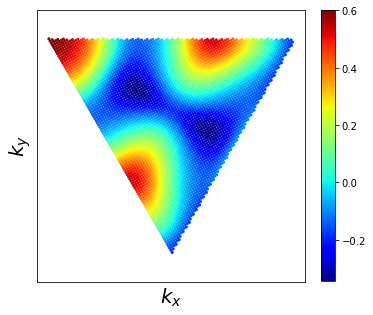

In [103]:
fig = plt.figure(figsize=(6,5))
plt.scatter(tx,ty,c=metal_band,cmap='jet',s=4)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel(r"$k_x$",fontsize=20)
plt.ylabel(r"$k_y$",fontsize=20)
plt.axis("equal")
# plt.savefig("hexagon_electron.png")
plt.show()

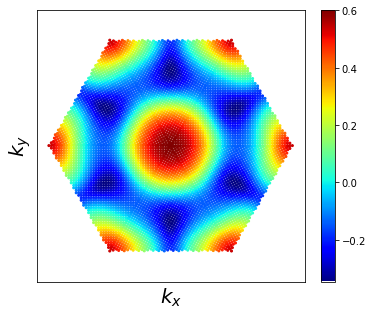

In [27]:
fig = plt.figure(figsize=(6,5))
plt.scatter(hx,hy,c=metal_band,cmap='jet',s=4)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel(r"$k_x$",fontsize=20)
plt.ylabel(r"$k_y$",fontsize=20)
plt.axis("equal")
# plt.savefig("hexagon_electron.png")
plt.show()

In [232]:
high_temp = np.loadtxt("/work/bansil/s.sevim/0_NbSe2_Work/0.00565/results/omega/omega_1.dat")

In [237]:
nk = 24*24
nq = 12800

In [246]:
high_temp.reshape(nq,nk).T[0]

array([12.04444999, 12.03332349, 12.00069704, ...,  0.02861607,
        0.02849986,  0.02842943])